In [5]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Create a file path
filepath = "../Resources/data.csv"
# Read in the data.
df = pd.read_csv(filepath)
df.head()

,Card,Quantity,Pilot,Archetype,Event,Date Posted,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price EUR,Price USD,Rarity
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2019-01-25,({T}: Add {W} or {U}.)\r\nAs Hallowed Fountain...,Land — Plains Island,11.93,11.31,rare
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2023-04-21,({T}: Add {W} or {U}.)\r\nPrairie Stream enter...,Land — Plains Island,0.21,0.16,rare
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2020-04-17,({T}: Add {W} or {U}.)\r\nIrrigated Farmland e...,Land — Plains Island,0.76,0.96,rare
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2023-04-21,"{T}: Add {C}.\r\n{2}, {T}, Sacrifice Field of ...",Land,0.05,0.15,uncommon
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,3.70,4.80,rare


In [8]:
# count number of colors/color combinations and the number of each occurrance
colours = df['Colours'].value_counts()
print(colours)
print(type(colours))
# 23 variations as series. I don't see any null vales or bad data.

Colours
[]                      877
['U']                   274
['B']                   274
['W']                   267
['G']                   183
['R']                   174
['B', 'R']               76
['U', 'W']               61
['G', 'R']               29
['G', 'U']               24
['B', 'U']               14
['B', 'G']               10
['G', 'W']                8
['R', 'U']                7
['R', 'W']                5
['B', 'W']                5
['G', 'R', 'W']           4
['B', 'G', 'U']           4
['B', 'G', 'U', 'W']      4
['G', 'R', 'U', 'W']      3
['B', 'R', 'U']           1
['R', 'U', 'W']           1
['G', 'R', 'U']           1
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


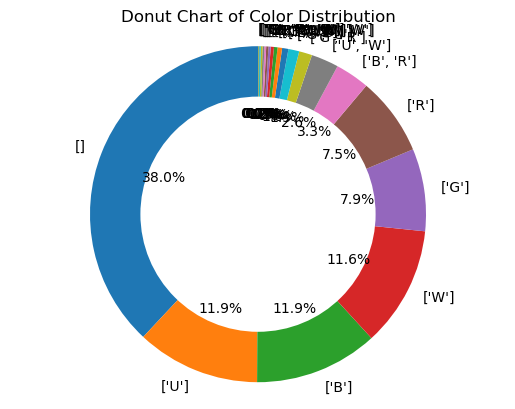

In [9]:
# Create a donut chart
plt.pie(colours, labels=colours.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Donut Chart of Color Distribution')
plt.show()

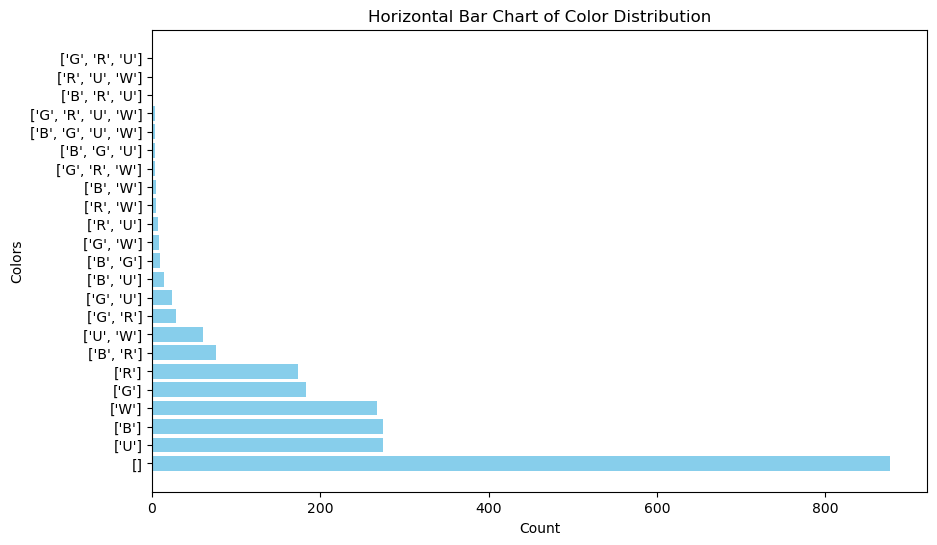

In [14]:
# The labels are messy where the color count is low.
# Suggest horizontal bar chart.

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))  # Set the figure size

plt.barh(colours.index, colours.values, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Colors')
plt.title('Horizontal Bar Chart of Color Distribution')

plt.show()